**DEEP REINFORCEMENT LEARNING NANODEGREE - UDACITY**
___

#  Project 1: Navigation
---


In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).


## Table of content

* [I. Getting acquainted with the Environment](#start-env)
    * [I.1 Start](#start)
    * [I.2 Examine the State and Action Spaces](#exam-spaces)
    * [I.3 Take Random Actions in the Environment](#random-actions)
* [II. Utilities functions](#utils)    
* [III. Vanilla DQN](#vanilla)
    * [III.1 Default hyperparameters](#vanilla-default)
    * [III.2 More frequent updates](#more-updates)
    * [III.3 Less exploration](#less-exploration)
    * [III.4 More systematic hyperparameters tuning](#systematic-tuning)
* [IV. Double DQN (DDQN)](#double-dqn)
    * [IV.1 DQN vs. DDQN](#dqn-ddqn)
* [V. Prioritized Experience Replay DQN](#prior-replay)
* [VI. Hyper-parameters tuning](#tuning)

## I. Getting acquainted with the Environment
<a id="getting-acquainted"></a>

### I.1 Start
<a id="start"></a>
We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# When executed in the workspace
!pip -q install ./python

In [2]:
import numpy as np
import pandas as pd
import random
import torch
from collections import deque
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment

from dqn_agent import Vanilla, Double, PrioritizedReplay
from workspace_utils import active_session

plt.style.use('fivethirtyeight')
%matplotlib inline
%load_ext autoreload
%autoreload 2

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
# When executed locally
env = UnityEnvironment(file_name="Banana.app", seed=123)

In [3]:
# when executed in workspace [please do not modify the line below]
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64", seed=123)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### I.2. Examine the State and Action Spaces
<a id="exam-spaces"></a>

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          1.          0.          0.          0.34538859  0.          1.
  0.          0.          0.59930861  0.          0.          1.          0.
  0.02931019  0.          1.          0.          0.          0.34140164
  0.          0.          1.          0.          0.05138472  0.          0.
  1.          0.          0.29204866  0.          0.          1.          0.
  0.29252312  0.          0.        ]
States have length: 37


### I.3. Take Random Actions in the Environment
<a id="random-actions"></a>

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

* **It's Your Turn!**

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## II. Utilities functions
<a id="utils"></a>

In [6]:
def unity_step_wrap(action):
    """Unity Environment action wrapper
    
    Params
    ======
        action (int): action to take
     
    Return
    ======
        OpenAI-like action outcome (tuple): bundled (next_state, reward, done)
    """
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    return (next_state, reward, done)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, 
        priorReplay=False, beta_start=0.4, name="default"):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    beta = lambda episode: min(1.0, beta_start + episode * (1.0 - beta_start) / n_episodes/2)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]            
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = unity_step_wrap(action)
            if priorReplay: 
                agent.step(state, action, reward, next_state, done, beta(i_episode))
            else:
                agent.step(state, action, reward, next_state, done)
                
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)), end="\n")
            
            checkpoint = {
                'state_size': state_size,
                'action_size': action_size,
                'hidden_layers': [each.out_features for each in agent.qnetwork_local.hidden_layers],
                'state_dict': agent.qnetwork_local.state_dict(),
                'scores': scores}
            
            torch.save(checkpoint, 'checkpoint-' + name + '.pth')                
            break
            
    return scores

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def plot_scores(scores, smooth_window=50):
    scores_smoothed = moving_average(scores, smooth_window)
    # plot the scores
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, linewidth=1, alpha=0.4, color='steelblue')
    plt.plot(np.arange(len(scores))[smooth_window-1:,], scores_smoothed, linewidth=1.5, alpha=1, color='firebrick')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    return (checkpoint['state_size'], checkpoint['action_size'], 
            checkpoint['hidden_layers'], checkpoint['state_dict'], checkpoint['scores'])

## III. Vanilla DQN
<a id="vanilla"></a>

### III.1 Default hyperparameters
<a id="vanilla-default"></a>

In [8]:
# reset the environment
env_info =  env.reset(train_mode=True)[brain_name]
agent = Vanilla(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], seed=0)

In [9]:
with active_session():
    %time scores = dqn(name="vanilla-dqn")

Episode 100	Average Score: 1.08
Episode 200	Average Score: 4.16
Episode 300	Average Score: 7.56
Episode 400	Average Score: 9.88
Episode 500	Average Score: 12.88
Episode 502	Average Score: 13.00
Environment solved in 402 episodes!	Average Score: 13.00
CPU times: user 6min 7s, sys: 35.4 s, total: 6min 43s
Wall time: 4h 9min 52s


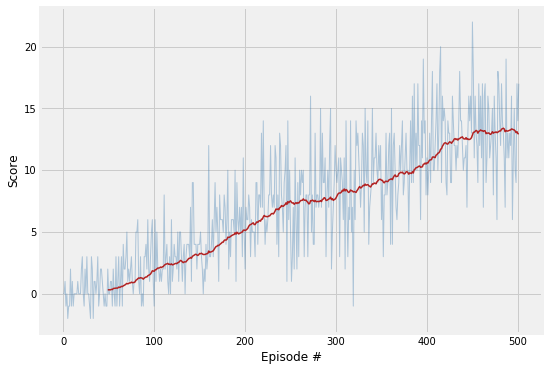

In [10]:
_, _, hidden_layers, state_dict, scores_dqn = load_checkpoint('checkpoint-vanilla-dqn.pth')
plot_scores(scores_dqn)

### III.2 More frequent updates
<a id="more-updates"></a>

In [11]:
# reset the environment
env_info =  env.reset(train_mode=True)[brain_name]
agent = Vanilla(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], update_every=2, seed=0)

In [12]:
with active_session():
    %time scores = dqn(name="vanilla-dqn-every-2")

Episode 100	Average Score: 0.47
Episode 200	Average Score: 4.26
Episode 300	Average Score: 7.73
Episode 400	Average Score: 10.04
Episode 500	Average Score: 12.28
Episode 537	Average Score: 13.04
Environment solved in 437 episodes!	Average Score: 13.04
CPU times: user 9min 15s, sys: 45.2 s, total: 10min
Wall time: 4h 27min 23s


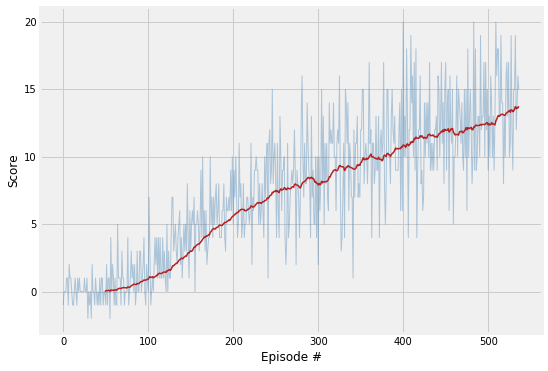

In [13]:
_, _, hidden_layers, state_dict, scores_dqn = load_checkpoint('checkpoint-vanilla-dqn-every-2.pth')
plot_scores(scores_dqn)

### III.3 Less exploration
<a id="less-exploration"></a>

In [7]:
# reset the environment
env_info =  env.reset(train_mode=True)[brain_name]
agent = Vanilla(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], seed=0)

In [ ]:
with active_session():
    %time scores = dqn(name="vanilla-dqn-less-exploration", eps_start=0.5, eps_decay=0.995)

Episode 100	Average Score: 3.16
Episode 111	Average Score: 3.44

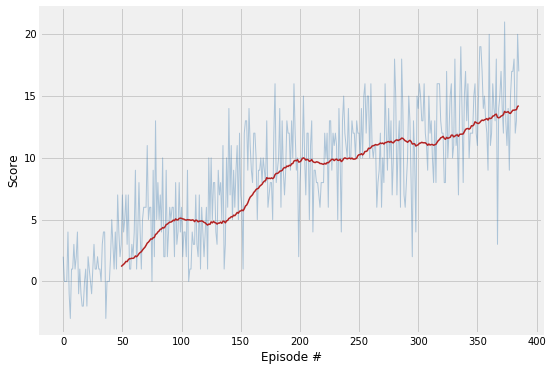

In [11]:
_, _, hidden_layers, state_dict, scores_dqn = load_checkpoint('checkpoint-vanilla-dqn-less-exploration.pth')
plot_scores(scores_dqn)

### III.4 More systematic hyperparameters tuning
<a id="systematic-tuning"></a>

In [7]:
eps_start = [0.5, 0.75, 0.9]
buffer_size = [int(1e5), int(1e6)]
batch_size = [64, 128]
gamma = [0.97, 0.98, 0.99]
lr = [0.0001, 0.0005]

params_space = [eps_start, buffer_size, batch_size, gamma, lr]

In [ ]:
import itertools

best_score = -10
n_episodes = 50
best_params = None

with active_session():
    for element in itertools.product(*params_space):
        eps_start, buffer_size, batch_size, gamma, lr = element
    
        # reset the environment
        env_info =  env.reset(train_mode=True)[brain_name]
        agent = Vanilla(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], 
                        buffer_size=buffer_size, batch_size=batch_size, gamma=gamma,
                        lr=lr, seed=0)
        scores = dqn(n_episodes=n_episodes, name="vanilla-dqn-tuning", eps_start=eps_start)
        
        mean_scores = np.mean(scores[-int(n_episodes/2):])
                          
        if mean_scores > best_score:
            best_score = np.mean(scores[-int(n_episodes/2):])
            best_params = element

Episode 20	Average Score: 0.450

In [ ]:
print(best_params)

In [ ]:
print(best_score)

## IV. Double DQN
<a id="double-dqn"></a>

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
agent = Double(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], seed=0)

In [8]:
with active_session():
    %time scores = dqn(name="double-dqn", eps_start=0.5, eps_decay=0.995)

Episode 100	Average Score: 0.45
Episode 200	Average Score: 4.27
Episode 300	Average Score: 9.17
Episode 400	Average Score: 11.87
Episode 459	Average Score: 13.06
Environment solved in 359 episodes!	Average Score: 13.06
CPU times: user 6min 21s, sys: 31.5 s, total: 6min 53s
Wall time: 3h 48min 28s


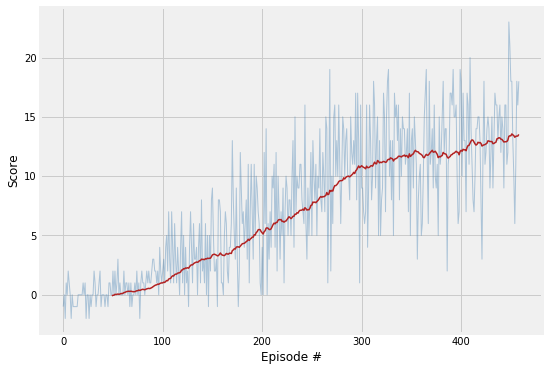

In [9]:
_, _, hidden_layers, state_dict, scores_ddqn = load_checkpoint('checkpoint-double-dqn.pth')
plot_scores(scores_ddqn)

### IV.1 DQN vs. DDQN
<a id="dqn-ddqn"></a>

* **Comparing rolling mean of scores**

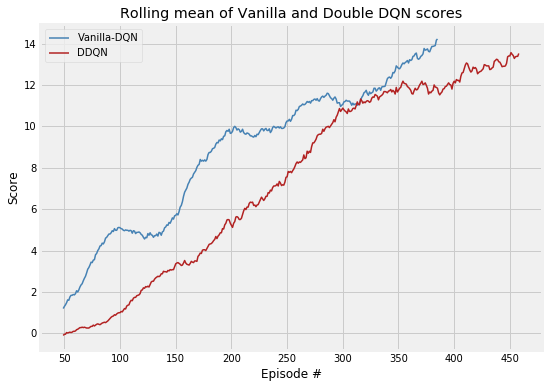

In [12]:
smooth_window = 50

scores_mean_vanilla = pd.Series(scores_dqn).rolling(window=smooth_window).mean().values
scores_mean_ddqn = pd.Series(scores_ddqn).rolling(window=smooth_window).mean().values

# plot the scores
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_mean_vanilla)), scores_mean_vanilla, linewidth=1.5, alpha=1, color='steelblue', label="Vanilla-DQN")
plt.plot(np.arange(len(scores_mean_ddqn)), scores_mean_ddqn, linewidth=1.5, alpha=1, color='firebrick', label="DDQN")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Rolling mean of Vanilla and Double DQN scores')
ax.legend()
plt.show()

* **Comparing smoothed rolling standard deviation**

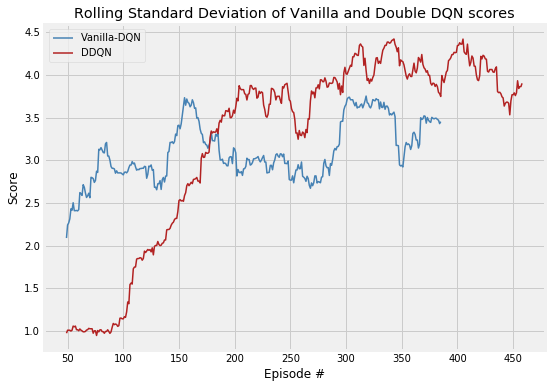

In [13]:
smooth_window = 50
scores_std_vanilla = pd.Series(scores_dqn).rolling(window=smooth_window).std().values
scores_std_ddqn = pd.Series(scores_ddqn).rolling(window=smooth_window).std().values

# plot the scores
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_std_vanilla)), scores_std_vanilla, linewidth=1.5, alpha=1, color='steelblue', label="Vanilla-DQN")
plt.plot(np.arange(len(scores_std_ddqn)), scores_std_ddqn, linewidth=1.5, alpha=1, color='firebrick', label="DDQN")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Rolling Standard Deviation of Vanilla and Double DQN scores')
ax.legend()
plt.show()

## VI. Hyper-parameters tuning
<a id="tuning">

### V.1 DQN - tuned
<a id="dqn-ddqn"></a>

```
n_episodes=1000
max_t=1000
eps_start=0.5
eps_end=0.01
eps_decay=0.98

BUFFER_SIZE = int(1e6)
BATCH_SIZE = 128
GAMMA = 0.99
TAU = 1e-3
LR = 0.0001
UPDATE_EVERY = 2

hidden_layers = [64, 64]
```

In [10]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [11]:
agent = Vanilla(state_size=state_size, action_size=action_size, hidden_layers=[64, 64], 
                buffer_size=1e6, batch_size=128, gamma=0.99, lr=0.0001, update_every=2, seed=0)

In [ ]:
with active_session():
    %time scores = dqn(name="dqn-tuned", eps_start=0.5, eps_decay=0.98)

Episode 100	Average Score: 5.22
Episode 191	Average Score: 11.03

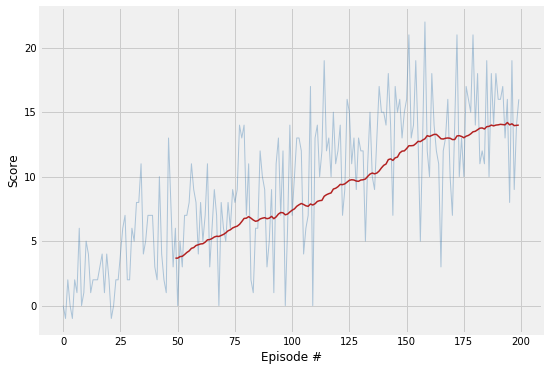

In [8]:
_, _, hidden_layers, state_dict, scores_dqn = load_checkpoint('checkpoint-dqn-tuned.pth')
plot_scores(scores_dqn)